In [20]:
import pandas as pd
import numpy as np
import re
import gensim
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
from wordcloud import WordCloud
from gensim import corpora, models, similarities
import pyLDAvis
from pprint import pprint
import pickle 
import os
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim.test.utils import datapath
import random
from gensim.models.ldamodel import LdaModel
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import MmCorpus
import csv
import pyLDAvis.gensim_models as gensimvis
RANDOM_STATE = 1

In [21]:
data = pd.read_csv('dataset/DatasetLegal.csv')
with open('model/id2word.pkl', 'rb') as f:
    id2word = pickle.load(f)
with open("lda/topic_dict_5.pkl", "rb") as f:
   topic_dict = pickle.load(f)
with open("lda/lda_model_5.pkl", "rb") as f:
    lda_model = pickle.load(f)
corpus_question = corpora.MmCorpus('model/corpus_question.mm')

str_answer = data['answer'].astype(str)
str_answer = str_answer.map(lambda x: re.sub('[,.!?*#/]', '', x))
str_question = data['question'].astype(str)
str_question = str_question.map(lambda x: re.sub('[,.!?*#/]', '', x))

train_answer = list(str_answer[:5625])
test_answer = list(str_answer[5625:])
train_question = list(str_question[:5625])
test_question = list(str_question[5625:])

In [22]:
def preprocess(text):
  stopwords = list(thai_stopwords())
  read_stopwords = pd.read_csv('dataset/add_stopwords.csv')
  add_stopwords = read_stopwords['stopword'].values.tolist()
  result = []
  str_text = str(text).replace(' ','')
  word_token = word_tokenize(str_text, engine='newmm')
  for word in word_token:
    if(word not in stopwords + add_stopwords):
      result.append(word)
  return result

def bow(text):
  vector = id2word.doc2bow(text)
  return vector

In [23]:
new_doc = random.choice(test_question)
test_doc = preprocess(new_doc)
test_doc = bow(test_doc)
# print(test_doc)
new_doc_topics = lda_model.get_document_topics(test_doc)
new_doc_topics_dict = {topic_dict[topic]: prob for topic, prob in new_doc_topics}
print(new_doc_topics_dict)

{'labor': 0.61881447, 'personal_right/court': 0.049487174, 'family/succession': 0.0008540091, 'contract': 0.3303244, 'criminal': 0.0005199374}


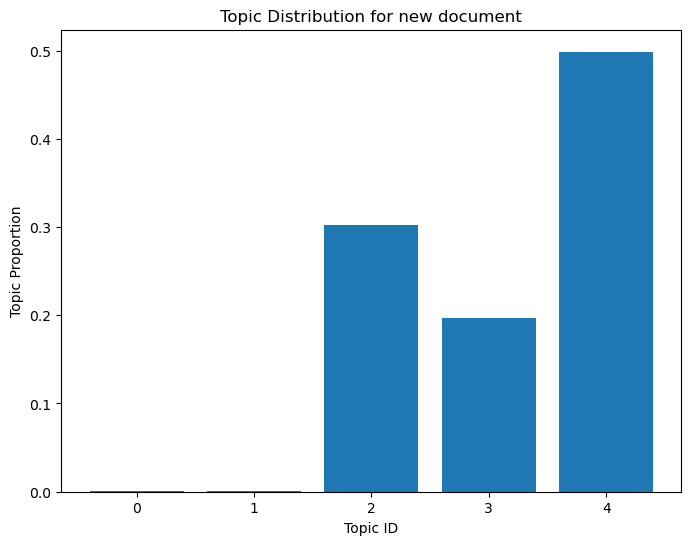

In [6]:
# plot the bar chart
plt.figure(figsize=(8,6))
plt.bar([t[0] for t in new_doc_topics], [t[1] for t in new_doc_topics])
plt.xlabel('Topic ID')
plt.ylabel('Topic Proportion')
plt.title(f'Topic Distribution for new document')
plt.show()

In [32]:
corpus_lda = lda_model[corpus_question]
index = similarities.MatrixSimilarity(corpus_lda, num_features=len(id2word))
sims = index[new_doc_topics]
sims_sorted = sorted(enumerate(sims), key=lambda item: -item[1])
print(f"Topic distribution for new document : {new_doc_topics}\n{new_doc}\n")
for doc_id, similarity in sims_sorted[:5]:
    print(f"Document ID: {doc_id}, Similarity score: {similarity}")
    print(f"question: {data.question[doc_id]}")
    print(f"answer: {data.answer[doc_id]}")
    print("Topic distribution for similar document : ")
    for num, dis in corpus_lda[doc_id]:
      print(f"\t({topic_dict.get(num)}, {'%.5f' %dis})")
    #print("\n")
    #print(f"Topic distribution for similar document : \n{corpus_lda[doc_id]}\n")

Topic distribution for new document : [(0, 0.61881447), (1, 0.049487174), (2, 0.0008540091), (3, 0.3303244), (4, 0.0005199374)]
อยากทราบว่าผมได้เข้าทดลองงานตำแหน่งเจ้าหน้าที่ธุรการในที่ทำงานแห่งหนึ่งเป็นระยะเวลาเดือนโดยสอบเข้าได้เป็นลำดับที่และมีคุณสมบัติครบถ้วนตามประกาศของที่ทำงานนั้นพอผมทดลองงานได้ครบเดือนกลับต้องผิดหวังเนื่องจากไม่ได้รับการพิจารณาบรรจุและเลิกจ้างซึ่งผมไม่ได้กระทำความผิดร้ายแรงใดๆที่ก่อให้เกิดความเสียหายต่อที่ทำงานเลยแม้แต่น้อยโดยที่ทำงานให้เหตุผลว่าวุฒิภาวะน้อยเกินไปและจะให้โยกตำแหน่งไปทำหน้าที่คนขับรถแทนควบตำแหน่งโดยที่ผลสอบเข้ามาเป็นเจ้าหน้าที่ธุรการและตอนสัมภาษณ์งานก็ไม่ได้พูดถึงเรื่องขับรถให้ฟังและในคุณสมบัติที่ประกาศก็บอกแต่เพียงอายุปีขึ้นสามารถขับรถยนต์ได้พิมพ์ดีดได้เท่านั้นไม่มีรายละเอียดปลีกย่อยใดๆซึ่งในการทดลองงานผมทุมเทกับงานมาตลอดเข้างานเลิกงานบางครั้งถึงนผมก็ไม่บ่นเพราะเป็นงานแรกของผมอยากจะถามว่าผมจะดำเนินการอย่างไรได้บ้างจากข้อสังเกตที่ทำงานนี้อาจจะไม่ต้องการผมตั้งแต่แรกแล้วก็ได้แล้วทำไมต้องหลอกลวงกันให้มาทดลองงานเสียเวลาไปเดือนสละสิทธิ์การเรียนอะไรต่าง

ValueError: unable to parse line: b' 273 1\r\n'

In [31]:
corpus_lda